In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import sys
sys.path.append('../src')
from compare import get_map_results_for_files, get_cer_bleu_for_files

In [64]:
text_gt_path = '../target/samples/text/'
text_pred_path = '../output/samples/text/'
text_pred_path_paddle = '../output/samples/text_paddle/'
text_pred_path_easyocr = '../output/samples/text_easyocr/'
text_pred_path_tesseract = '../output/samples/text_tesseract/'
text_pred_path_preview = '../output/samples/text_preview/'

position_gt_path = '../target/samples/positions/'
position_pred_path = '../output/samples/positions/'
position_pred_path_paddle = '../output/samples/positions_paddle/'
position_pred_path_easyocr = '../output/samples/positions_easyocr/'
position_pred_path_tesseract = '../output/samples/positions_tesseract/'

confidence_path = '../output/samples/confidence.csv'

font_path = '/Users/tianxiangsong/Library/Fonts/cambria.ttf'
font_l = FontProperties(fname=font_path, size=36)
font_s = FontProperties(fname=font_path, size=24)

In [65]:
print("Result of our method:")
map_results, map_results_for_file = get_map_results_for_files(position_gt_path, position_pred_path)
CERs, BLEU_4s = get_cer_bleu_for_files(text_gt_path, text_pred_path)

print("\nResult of paddle:")
map_results_paddle, map_results_paddle_for_file = get_map_results_for_files(position_gt_path, position_pred_path_paddle)
CERs_paddle, BLEU_4s_paddle = get_cer_bleu_for_files(text_gt_path, text_pred_path_paddle)

print("\nResult of easyocr:")
map_results_easyocr, map_results_easyocr_for_file = get_map_results_for_files(position_gt_path, position_pred_path_easyocr)
CERs_easyocr, BLEU_4s_easyocr = get_cer_bleu_for_files(text_gt_path, text_pred_path_easyocr)

print("\nResult of tesseract:")
map_results_tesseract, map_results_tesseract_for_file = get_map_results_for_files(position_gt_path, position_pred_path_tesseract)
CERs_tesseract, BLEU_4s_tesseract = get_cer_bleu_for_files(text_gt_path, text_pred_path_tesseract)

print("\nResult of preview:")
CERs_preview, BLEU_4s_preview = get_cer_bleu_for_files(text_gt_path, text_pred_path_preview)

Result of our method:
IoU threshold: 0.50, mAP: 0.8919
IoU threshold: 0.55, mAP: 0.8919
IoU threshold: 0.60, mAP: 0.8902
IoU threshold: 0.65, mAP: 0.8841
IoU threshold: 0.70, mAP: 0.8762
IoU threshold: 0.75, mAP: 0.8543
IoU threshold: 0.80, mAP: 0.7574
IoU threshold: 0.85, mAP: 0.5343
IoU threshold: 0.90, mAP: 0.2315
IoU threshold: 0.95, mAP: 0.0182
mAP@[0.5:0.95]: 0.6830
File: 01.txt, CER: 0.5743707093821511, BLEU-4: 0.16592483203873953
File: 02.txt, CER: 0.1906116642958748, BLEU-4: 0.6526680164262233
File: 03.txt, CER: 0.14555765595463138, BLEU-4: 0.6967614290297293
File: 04.txt, CER: 0.14800759013282733, BLEU-4: 0.727360130662309
File: 05.txt, CER: 0.71, BLEU-4: 0.21043049914588144
File: 06.txt, CER: 0.4076782449725777, BLEU-4: 0.40803531812732624
File: 07.txt, CER: 0.32707774798927614, BLEU-4: 0.5087709066430591
File: 08.txt, CER: 0.20977011494252873, BLEU-4: 0.6514485015369463
File: 09.txt, CER: 0.12206572769953052, BLEU-4: 0.8005040763203134
File: 10.txt, CER: 0.5033333333333333,

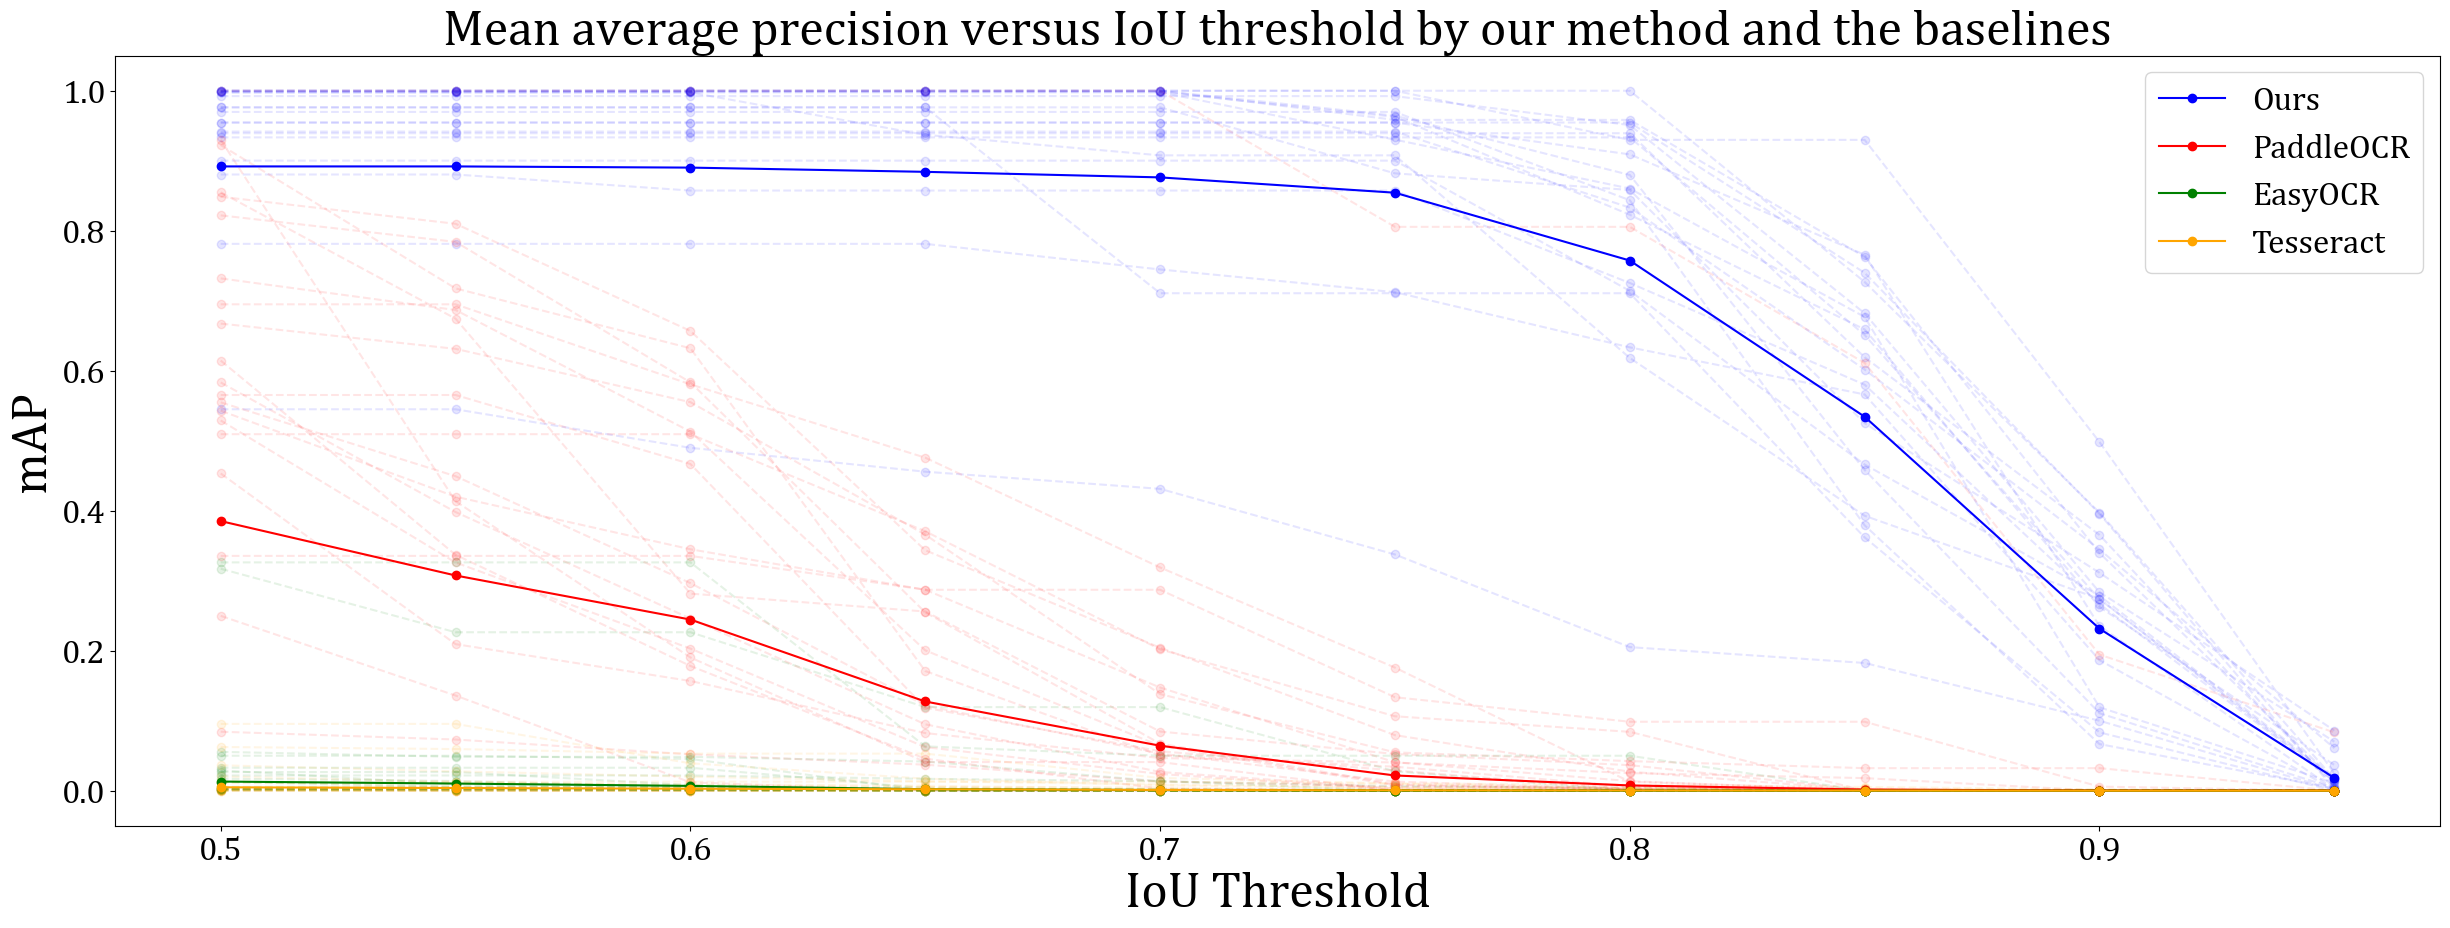

In [66]:
# Plot mAP versus each IoU threshold, for each file by our method and paddle method
plt.figure(figsize=(30, 10))
x = np.arange(0.5, 1.0, 0.05)

for filename in map_results_for_file.keys():
    plt.plot(x, map_results_for_file[filename], marker='o', color='blue', linestyle='--', alpha=0.1)
    plt.plot(x, map_results_paddle_for_file[filename], marker='o', color='red', linestyle='--', alpha=0.1)
    plt.plot(x, map_results_easyocr_for_file[filename], marker='o', color='green', linestyle='--', alpha=0.1)
    plt.plot(x, map_results_tesseract_for_file[filename], marker='o', color='orange', linestyle='--', alpha=0.1)
    

plt.plot(x, map_results, marker='o', color='blue', label='Ours')
plt.plot(x, map_results_paddle, marker='o', color='red', label='PaddleOCR')
plt.plot(x, map_results_easyocr, marker='o', color='green', label='EasyOCR')
plt.plot(x, map_results_tesseract, marker='o', color='orange', label='Tesseract')

plt.xlabel('IoU Threshold', fontproperties=font_l)
plt.ylabel('mAP', fontproperties=font_l)
plt.title('Mean average precision versus IoU threshold by our method and the baselines', fontproperties=font_l)
plt.xticks(fontproperties=font_s)
plt.yticks(fontproperties=font_s)
plt.legend(prop=font_s)
plt.show()

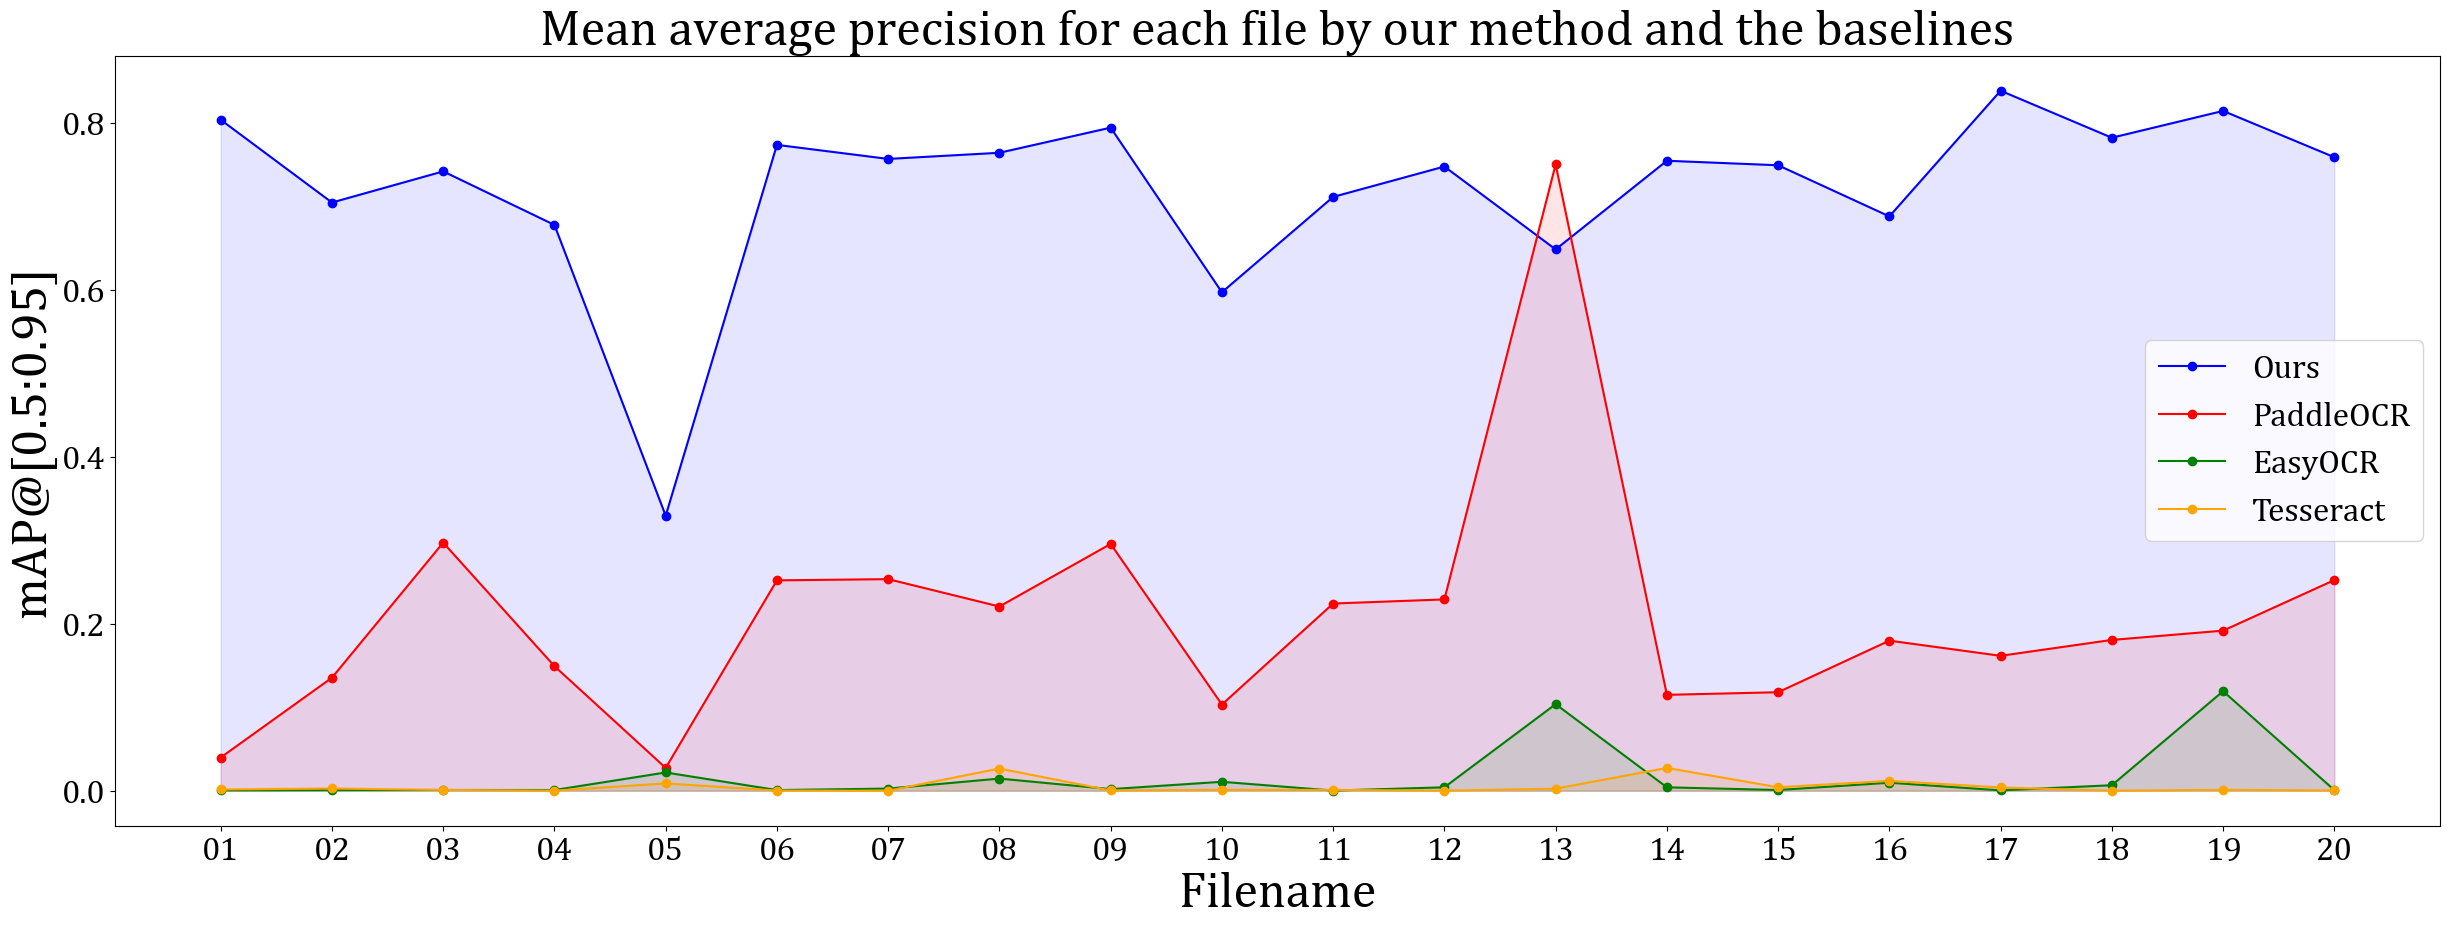

In [67]:
# Plot the mAP@[0.5:0.95] for each file by our method and paddle method
plt.figure(figsize=(30, 10))
x = np.arange(len(map_results_for_file.keys()))
y = [np.mean(v) for v in map_results_for_file.values()]
y_paddle = [np.mean(v) for v in map_results_paddle_for_file.values()]
y_easyocr = [np.mean(v) for v in map_results_easyocr_for_file.values()]
y_tesseract = [np.mean(v) for v in map_results_tesseract_for_file.values()]
filenames = [filename[:-4] for filename in list(map_results_for_file.keys())]

plt.plot(x, y, marker='o', color='blue', label='Ours')
plt.plot(x, y_paddle, marker='o', color='red', label='PaddleOCR')
plt.plot(x, y_easyocr, marker='o', color='green', label='EasyOCR')
plt.plot(x, y_tesseract, marker='o', color='orange', label='Tesseract')
plt.fill_between(x, y, color='blue', alpha=0.1)
plt.fill_between(x, y_paddle, color='red', alpha=0.1)
plt.fill_between(x, y_easyocr, color='green', alpha=0.1)
plt.fill_between(x, y_tesseract, color='orange', alpha=0.1)

plt.xlabel('Filename', fontproperties=font_l)
plt.ylabel('mAP@[0.5:0.95]', fontproperties=font_l)
plt.title('Mean average precision for each file by our method and the baselines', fontproperties=font_l)
plt.xticks(x, filenames, fontproperties=font_s)
plt.yticks(fontproperties=font_s)
plt.legend(prop=font_s)
plt.show()

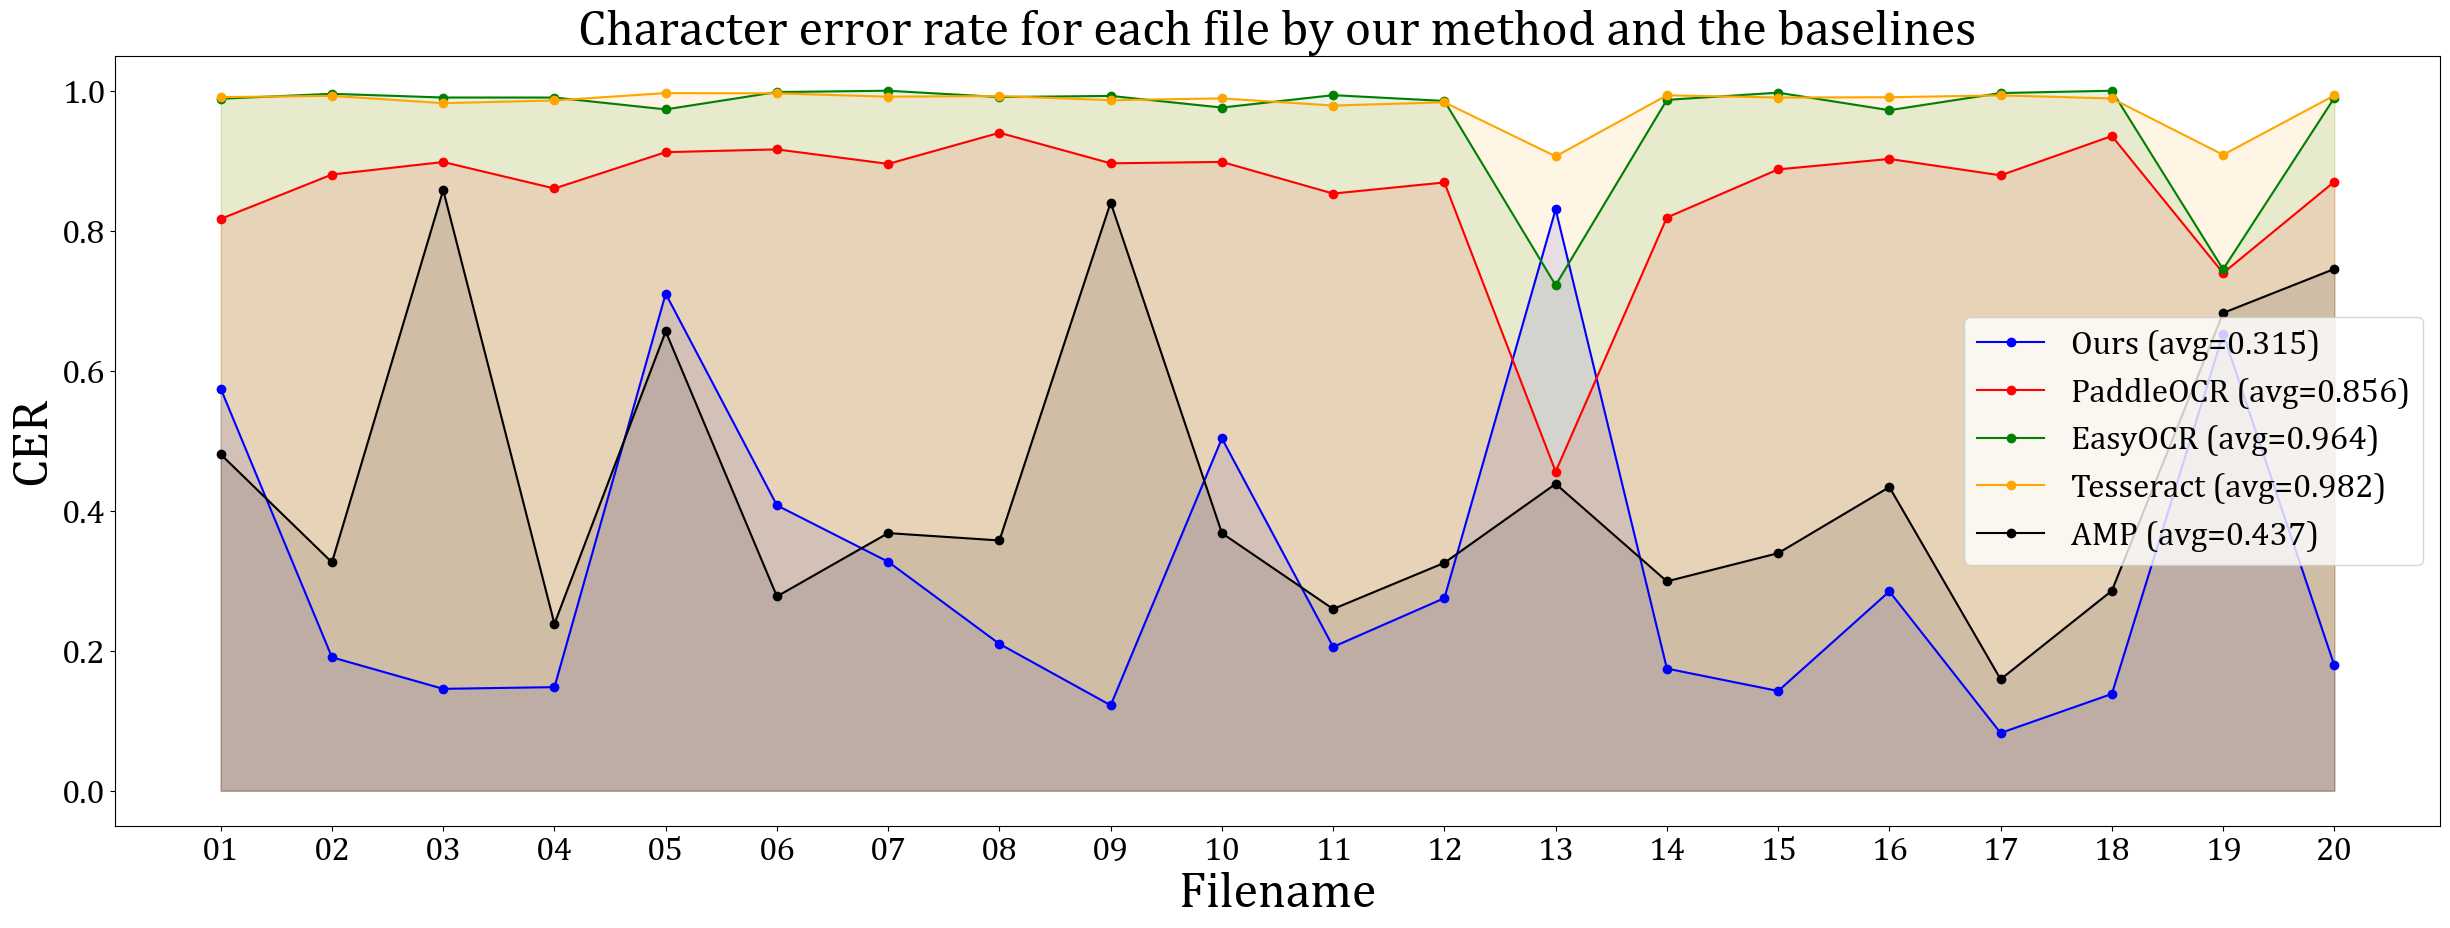

In [68]:
plt.figure(figsize=(30, 10))
plt.plot(x, CERs, marker='o', color='blue', label=f'Ours (avg={np.mean(CERs):.3f})')
plt.plot(x, CERs_paddle, marker='o', color='red', label=f'PaddleOCR (avg={np.mean(CERs_paddle):.3f})')
plt.plot(x, CERs_easyocr, marker='o', color='green', label=f'EasyOCR (avg={np.mean(CERs_easyocr):.3f})')
plt.plot(x, CERs_tesseract, marker='o', color='orange', label=f'Tesseract (avg={np.mean(CERs_tesseract):.3f})')
plt.plot(x, CERs_preview, marker='o', color='black', label=f'AMP (avg={np.mean(CERs_preview):.3f})')
plt.fill_between(x, CERs, color='blue', alpha=0.1)
plt.fill_between(x, CERs_paddle, color='red', alpha=0.1)
plt.fill_between(x, CERs_easyocr, color='green', alpha=0.1)
plt.fill_between(x, CERs_tesseract, color='orange', alpha=0.1)
plt.fill_between(x, CERs_preview, color='black', alpha=0.1)

plt.xlabel('Filename', fontproperties=font_l)
plt.ylabel('CER', fontproperties=font_l)
plt.title('Character error rate for each file by our method and the baselines', fontproperties=font_l)
plt.xticks(x, filenames, fontproperties=font_s)
plt.yticks(fontproperties=font_s)
plt.legend(prop=font_s)
plt.show()

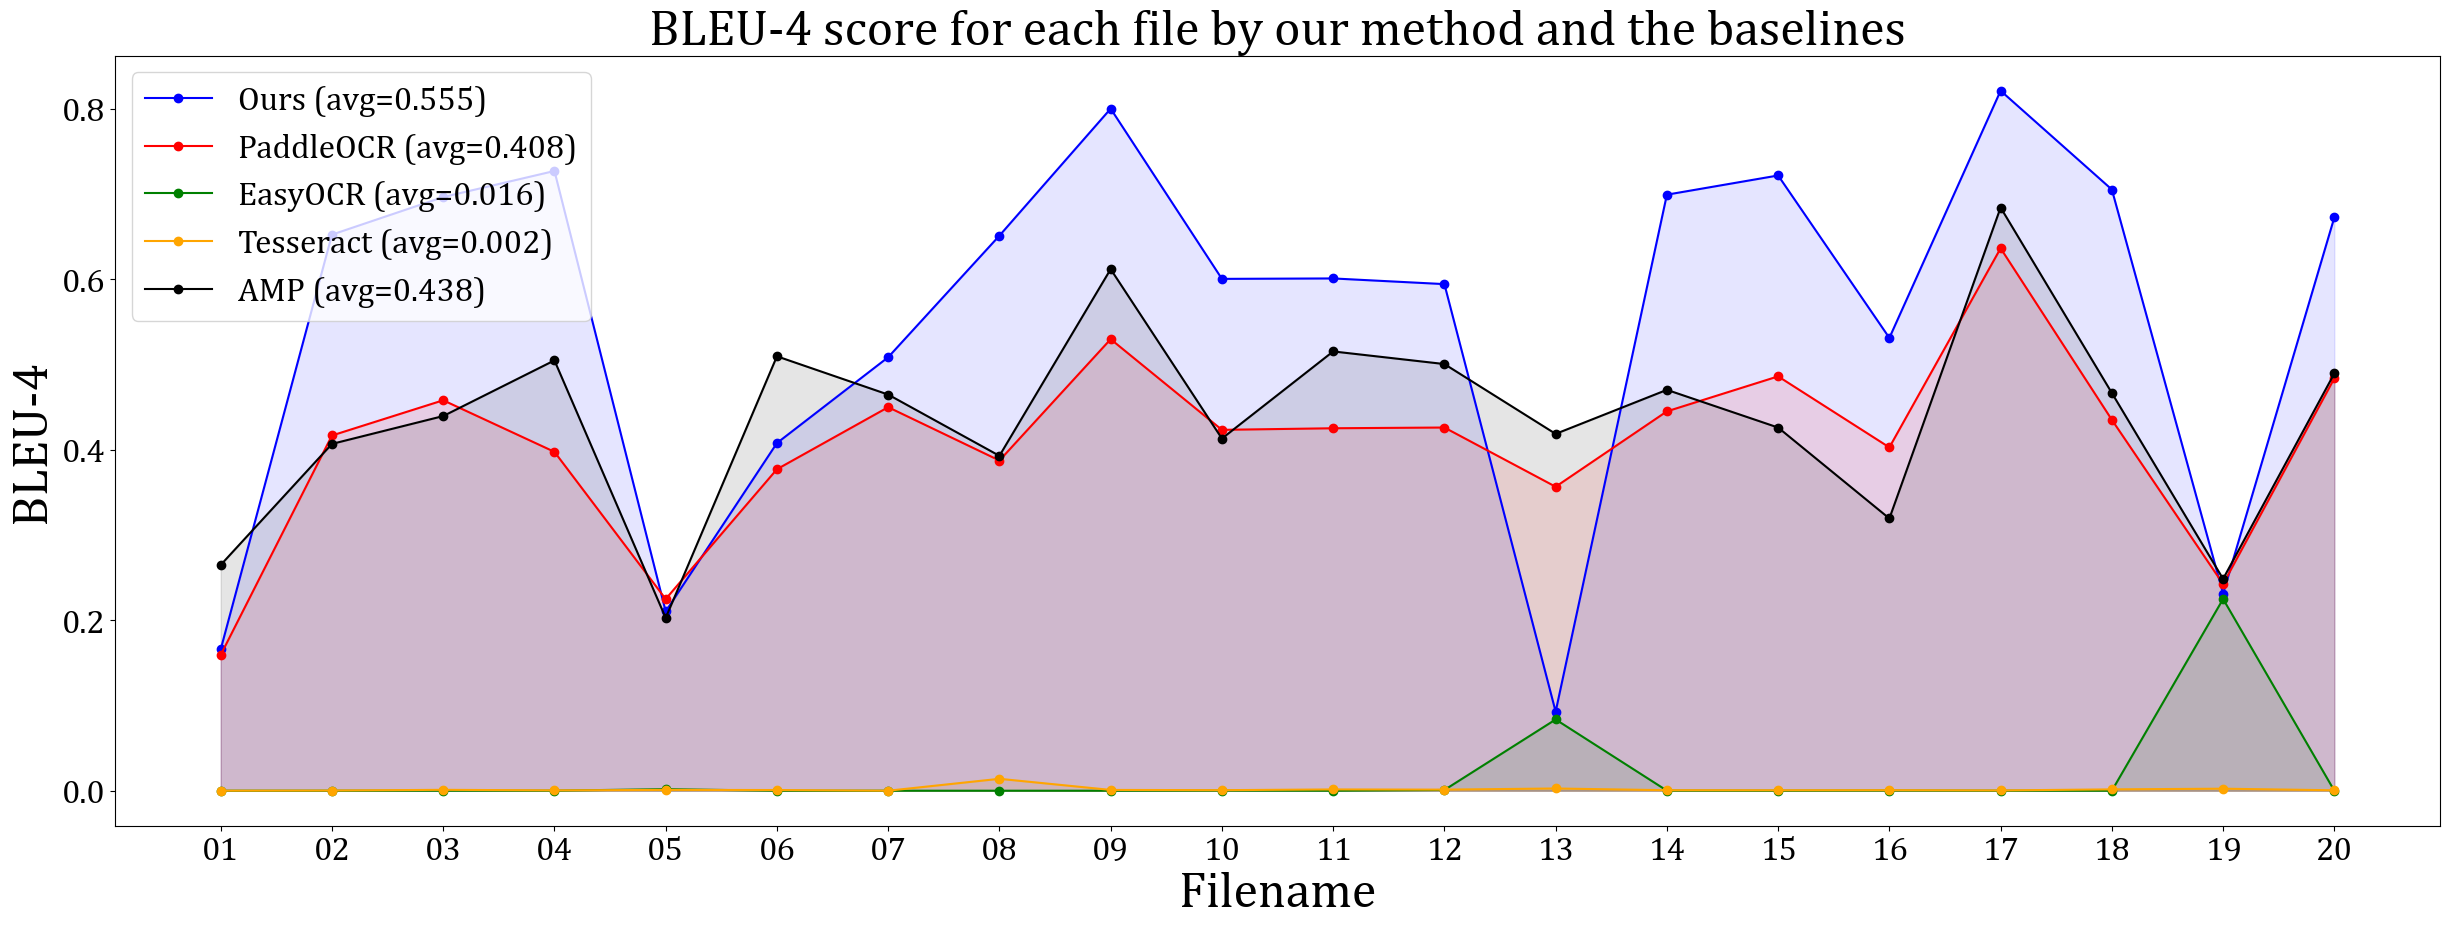

In [69]:
plt.figure(figsize=(30, 10))
plt.plot(x, BLEU_4s, marker='o', color='blue', label=f'Ours (avg={np.mean(BLEU_4s):.3f})')
plt.plot(x, BLEU_4s_paddle, marker='o', color='red', label=f'PaddleOCR (avg={np.mean(BLEU_4s_paddle):.3f})')
plt.plot(x, BLEU_4s_easyocr, marker='o', color='green', label=f'EasyOCR (avg={np.mean(BLEU_4s_easyocr):.3f})')
plt.plot(x, BLEU_4s_tesseract, marker='o', color='orange', label=f'Tesseract (avg={np.mean(BLEU_4s_tesseract):.3f})')
plt.plot(x, BLEU_4s_preview, marker='o', color='black', label=f'AMP (avg={np.mean(BLEU_4s_preview):.3f})')
plt.fill_between(x, BLEU_4s, color='blue', alpha=0.1)
plt.fill_between(x, BLEU_4s_paddle, color='red', alpha=0.1)
plt.fill_between(x, BLEU_4s_easyocr, color='green', alpha=0.1)
plt.fill_between(x, BLEU_4s_tesseract, color='orange', alpha=0.1)
plt.fill_between(x, BLEU_4s_preview, color='black', alpha=0.1)

plt.xlabel('Filename', fontproperties=font_l)
plt.ylabel('BLEU-4', fontproperties=font_l)
plt.title('BLEU-4 score for each file by our method and the baselines', fontproperties=font_l)
plt.xticks(x, filenames, fontproperties=font_s)
plt.yticks(fontproperties=font_s)
plt.legend(prop=font_s)
plt.show()